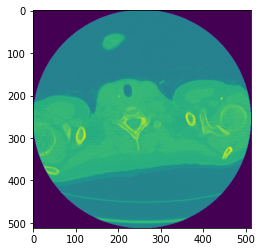

In [1]:
import pydicom as dicom
import matplotlib.pylab as plt

# specify your image path
image_path = '01-18-2005-NA-CT CHEST HIGH RESOLUTION-06379/2.000000-SUPINE CHEST RECON 12-09859/1-005.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

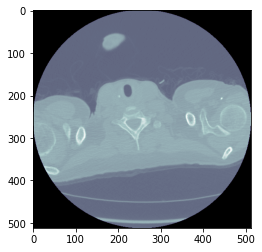

In [3]:
import matplotlib.pyplot as plt
import pydicom
import pydicom.data
  
# Full path of the DICOM file is passed in base
base = r"C:\Users\1\Desktop\cs\biome\test"
pass_dicom = "01-18-2005-NA-CT CHEST HIGH RESOLUTION-06379/2.000000-SUPINE CHEST RECON 12-09859/1-005.dcm"  # file name is 1-12.dcm
  
# enter DICOM image name for pattern
# result is a list of 1 element
filename = pydicom.data.data_manager.get_files(base, pass_dicom)[0]
  
ds = pydicom.dcmread(filename)
  
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()

In [107]:
# Creates a jpg copy of dicom img
import pydicom as dicom
import cv2   

# specify your image path
image_path = '1-005.dcm'
ds = dicom.dcmread(image_path)

pixel_array_numpy = ds.pixel_array

image_format = '.jpg' # or '.png'
image_path = image_path.replace('.dcm', image_format)

cv2.imwrite(image_path, pixel_array_numpy)

True

In [108]:
# Otsu thresholding
import numpy as np
image = cv2.imread('1-005.jpg', 0)
# Set total number of bins in the histogram
bins_num = 256
# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)
# Get normalized histogram if it is required
is_normalized = False
if is_normalized:
    hist = np.divide(hist.ravel(), hist.max())
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)


Otsu's algorithm implementation thresholding result:  137.958984375


In [109]:
otsu_threshold, image_result = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)


Obtained threshold:  138.0


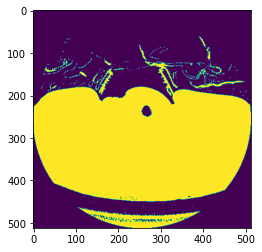

In [110]:
plt.imshow(image_result)

[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]

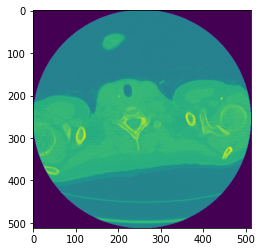

In [5]:
pixel = []
pixel.append(ds.pixel_array)
plt.imshow(pixel[0])
ds.ImageOrientationPatient

In [8]:
import SimpleITK as sitk

reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames('08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100')
reader.SetFileNames(dicom_names)
owo = reader.Execute()
#plt.imshow(sitk.GetArrayViewFromImage(owo))
display(owo)

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001AC25C8F750> >

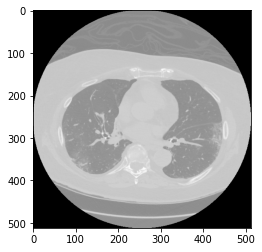

In [9]:
#getting specific slice (middle)
z = owo.GetDepth()//2
plt.imshow(sitk.GetArrayViewFromImage(owo)[z,:,:], cmap=plt.cm.Greys_r)

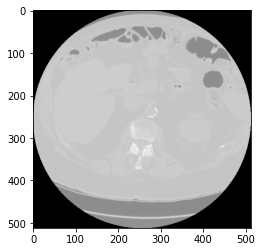

In [11]:
#getting specific slice (first)
z = 0
plt.imshow(sitk.GetArrayViewFromImage(owo)[z,:,:], cmap=plt.cm.Greys_r)

In [118]:
# Reads all dicom files and saves it as a mha file
import os
#Read a DICOM series and write it as a single mha file.

#data_directory = os.path.dirname('/Users/1/Desktop/cs/biome/manifest-1643762399600/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-CT CHEST WITHOUT CONTRAST-04614')
#series_ID = '601.000000-COR 3X3-86740'

# Use the functional interface to read the image series.
original_image = sitk.ReadImage(sitk.ImageSeriesReader_GetGDCMSeriesFileNames('08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100'))

# Write the image.

OUTPUT_DIR = './'
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

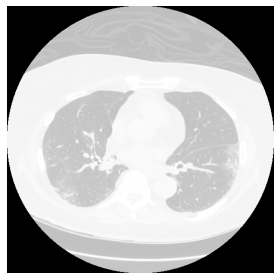

In [12]:
# Uses gui to show the mha/nrrd file, with an image slice slider
import gui
img = sitk.ReadImage('3DImage.mha')
gui.MultiImageDisplay(image_list = [img], figure_size=(8,4));


In [14]:
# another way to show the mha/nrrd file
from myshow import myshow, myshow3d

img_T1 = sitk.ReadImage('3DImage.mha')
#img_T2 = sitk.ReadImage()

# To visualize the labels image in RGB with needs a image with 0-255 range
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)
#img_T2_255 = sitk.Cast(sitk.RescaleIntensity(img_T2), sitk.sitkUInt8)

myshow3d(img_T1)

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [15]:
seg = img_T1 > 200
myshow(sitk.LabelOverlay(img_T1_255, seg), "Basic Thresholding")


interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [16]:
seg = sitk.BinaryThreshold(
    img_T1, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0
)
myshow(sitk.LabelOverlay(img_T1_255, seg), "Binary Thresholding")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [18]:
# Region growing with seed points
seed = (132, 250, 96)
seed2 = (250, 200, 48)
#seed2 = (250, 250, 96)
seg = sitk.Image(img_T1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img_T1)
seg[seed] = 1
seg[seed2] = 1
seg = sitk.BinaryDilate(seg, [3] * 3)
myshow(sitk.LabelOverlay(img_T1_255, seg), "Initial Seed")

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [ ]:
seg = sitk.ConnectedThreshold(img_T1, seedList=[seed], lower=100, upper=100)

myshow(sitk.LabelOverlay(img_T1_255, seg), "Connected Threshold")

In [ ]:
seg = sitk.ConfidenceConnected(
    img_T1,
    seedList=[seed],
    numberOfIterations=1,
    multiplier=2.5,
    initialNeighborhoodRadius=1,
    replaceValue=1,
)

myshow(sitk.LabelOverlay(img_T1_255, seg), "ConfidenceConnected")

In [ ]:
seed2 = (170, 280, 127)
seg = sitk.ConfidenceConnected(
    img_T1,
    seedList=[seed2],
    numberOfIterations=1,
    multiplier=2.5,
    initialNeighborhoodRadius=1,
    replaceValue=1,
)

myshow(sitk.LabelOverlay(img_T1_255, seg), "ConfidenceConnected")

In [ ]:
# Saving the Confidence connected region growing data
sitk.WriteImage(sitk.LabelOverlay(img_T1_255, seg), 'cc_results.mha')

In [19]:
# Creating the mask, utilizes from https://github.com/JoHof/lungmask
from lungmask import mask
import SimpleITK as sitk

input_image = sitk.ReadImage('3DImage2.mha')
segmentation = mask.apply(input_image)  # default model is U-net(R231)

KeyboardInterrupt: 

In [21]:
# Show the mask
myshow3d(sitk.ReadImage('mask/test.mha'))

interactive(children=(IntSlider(value=107, description='z', max=215), Output()), _dom_classes=('widget-interac…